<a href="https://colab.research.google.com/github/shahchhatru/Computer_vision_projects/blob/main/ArthimaticOperationsinOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Arithmetic and Bitwise Operations in OpenCV**

#### **In this lesson we'll learn:**
 [1. Arithmetic Operations]( !https://www.geeksforgeeks.org/arithmetic-operations-on-images-using-opencv-set-2-bitwise-operations-on-binary-images/?ref=lbp)

[2. Bitwise Operations]( !https://www.geeksforgeeks.org/arithmetic-operations-on-images-using-opencv-set-2-bitwise-operations-on-binary-images/?ref=lbp)

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()




def download_image(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Image downloaded successfully and saved as {save_path}")
    else:
        print("Failed to download image")



In [2]:



image_url="https://images.unsplash.com/photo-1682686580452-37f1892ee5e8?q=80&w=1975&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"  # Replace this with the actual image URL
save_path = 'downloaded_image.jpg'            # Specify the path where you want to save the image

download_image(image_url, save_path)

Image downloaded successfully and saved as downloaded_image.jpg


In [3]:
import glob

files=glob.glob("*.jpg")
files

['downloaded_image.jpg']

In [4]:
image = cv2.imread(files[0])

In [6]:
type(image), image.dtype, image.shape

(numpy.ndarray, dtype('uint8'), (1479, 1975, 3))

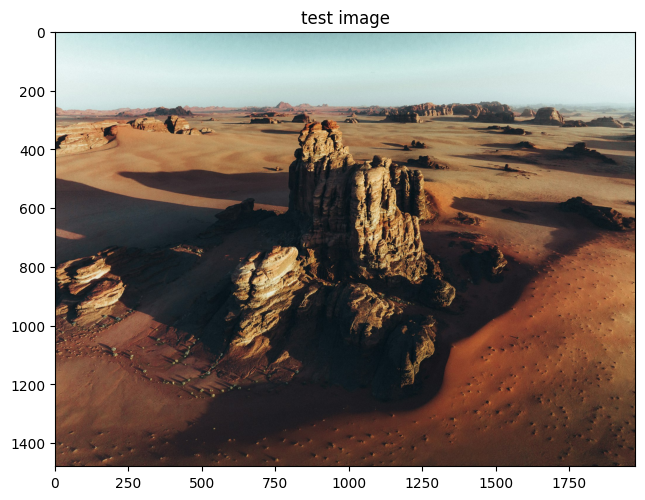

In [7]:
imshow("test image",image)

## **Arithmetic Operations**

These are simple operations that allow us to directly add or subract to the color intensity.

Calculates the per-element operation of two arrays. The overall effect is increasing or decreasing brightness.

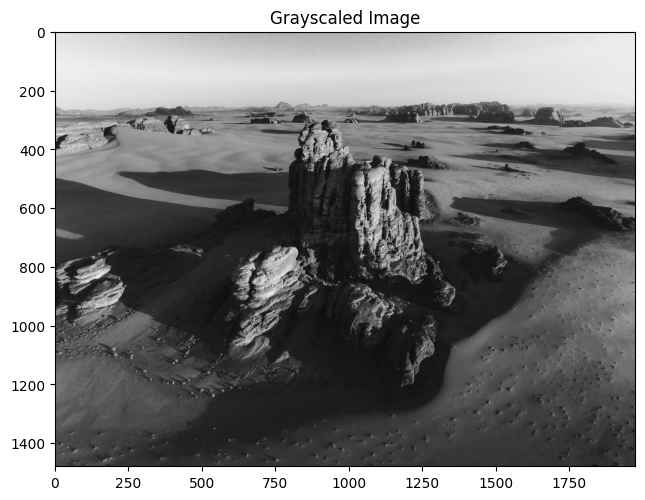

[[223 217 217 ... 232 230 229]
 [227 221 219 ... 232 230 229]
 [231 226 222 ... 232 231 232]
 ...
 [ 69  84  90 ...  42  46  50]
 [ 94  59  43 ...  45  45  49]
 [ 66  41  55 ...  45  35  29]]


In [8]:
# Adding comma zero in cv2.imread loads our image in as a grayscaled image
image = cv2.imread(files[0], 0)
imshow("Grayscaled Image",image)
print(image)

# Create a matrix of ones, then multiply it by a scaler of 100
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100



In [11]:
print(M)
print(M.shape)
print(image.shape)

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]
(1479, 1975)
(1479, 1975)


#### **Increasing Brightness**

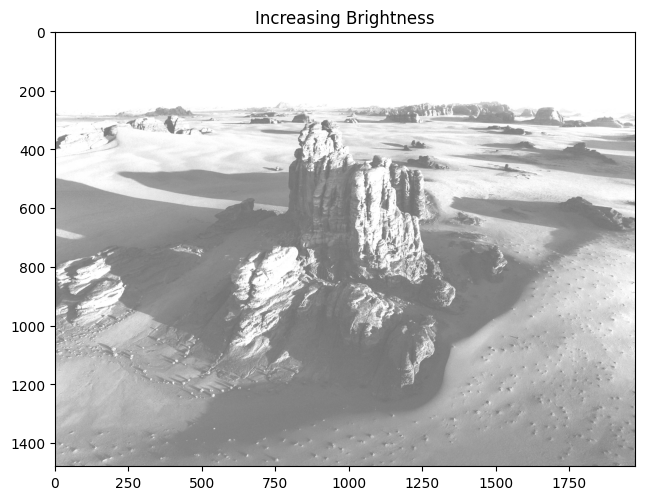

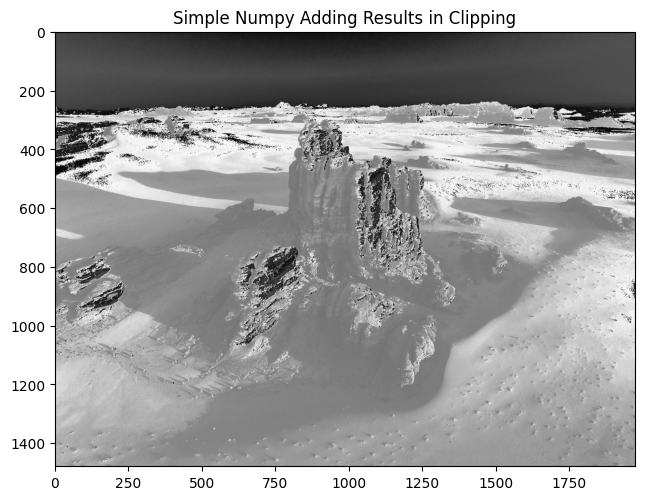

In [12]:
# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(image, M)
imshow("Increasing Brightness", added)

# Now if we just added it, look what happens
added2 = image + M
imshow("Simple Numpy Adding Results in Clipping", added2)

#### **Decreasing Brightness**

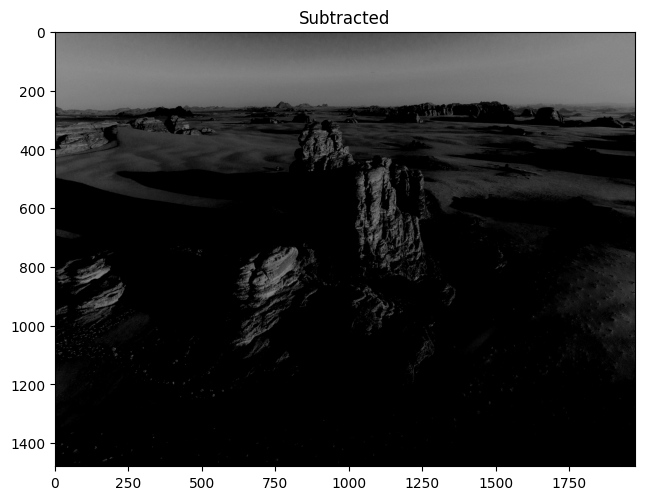

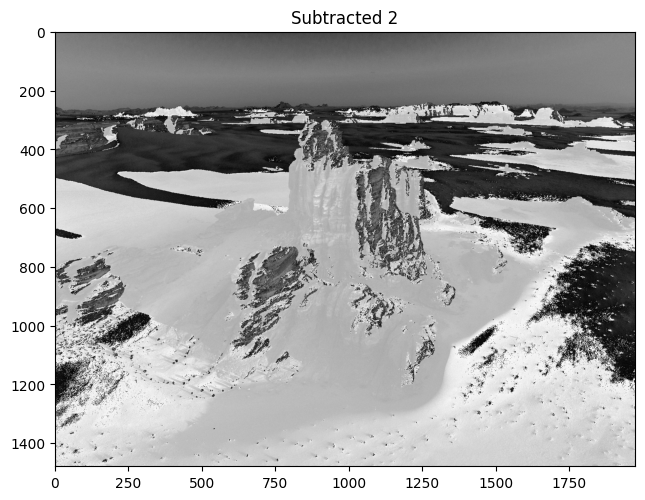

In [13]:
# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(image, M)
imshow("Subtracted", subtracted)

subtracted = image - M
imshow("Subtracted 2", subtracted)


## **Bitwise Operations and Masking**

To demonstrate these operations let's create some simple images

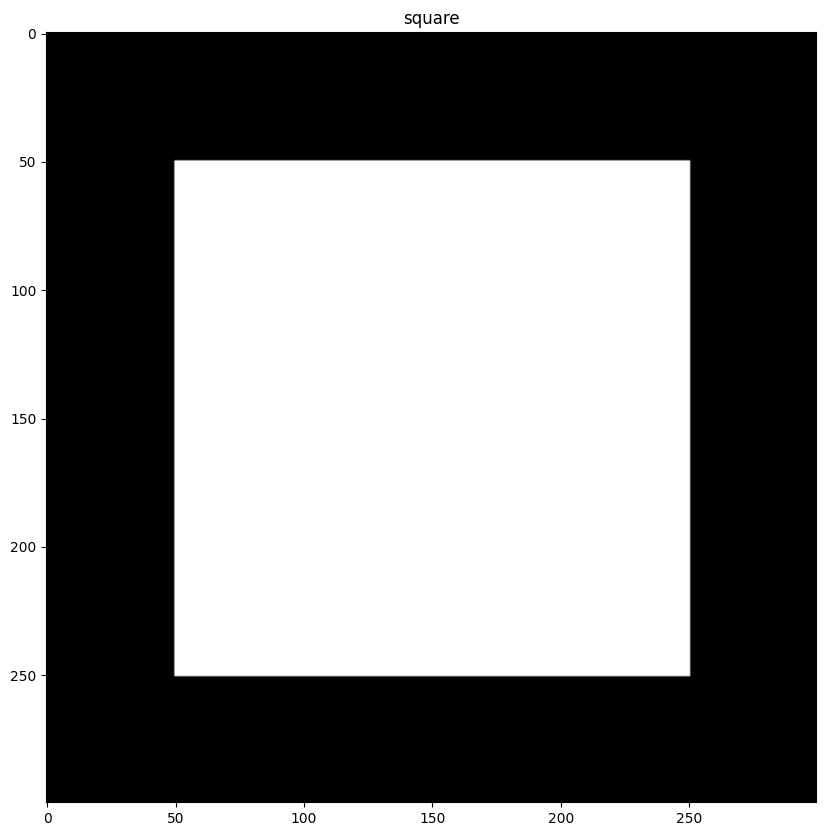

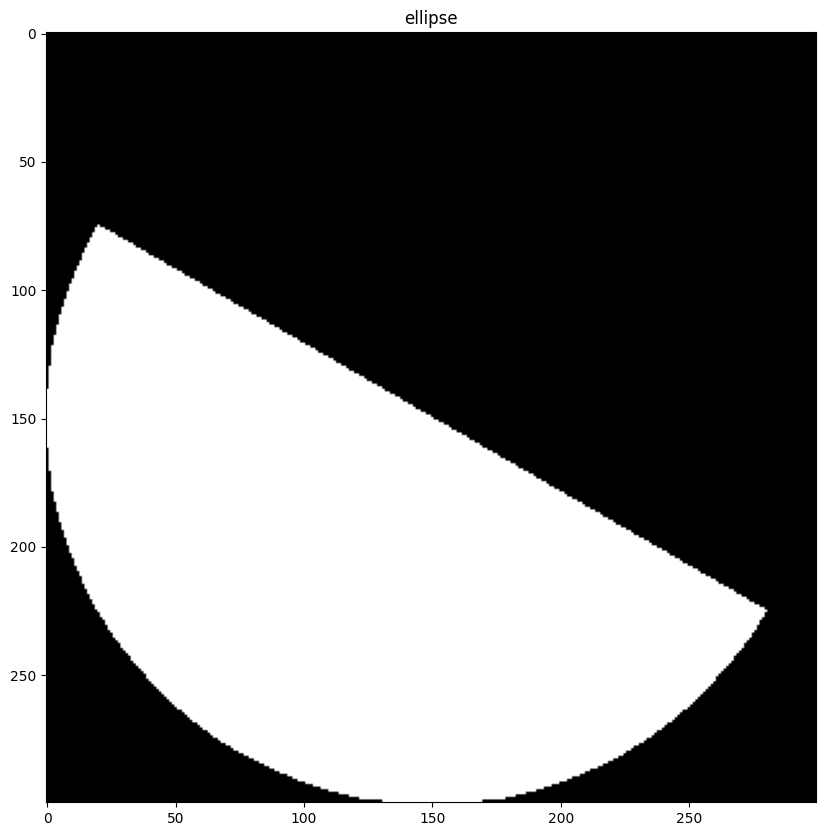

In [14]:
# If you're wondering why only two dimensions, well this is a grayscale image,

# Making a square
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
imshow("square", square)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
imshow("ellipse", ellipse)

### **Experimenting with some bitwise operations such as AND, OR, XOR and NOT**

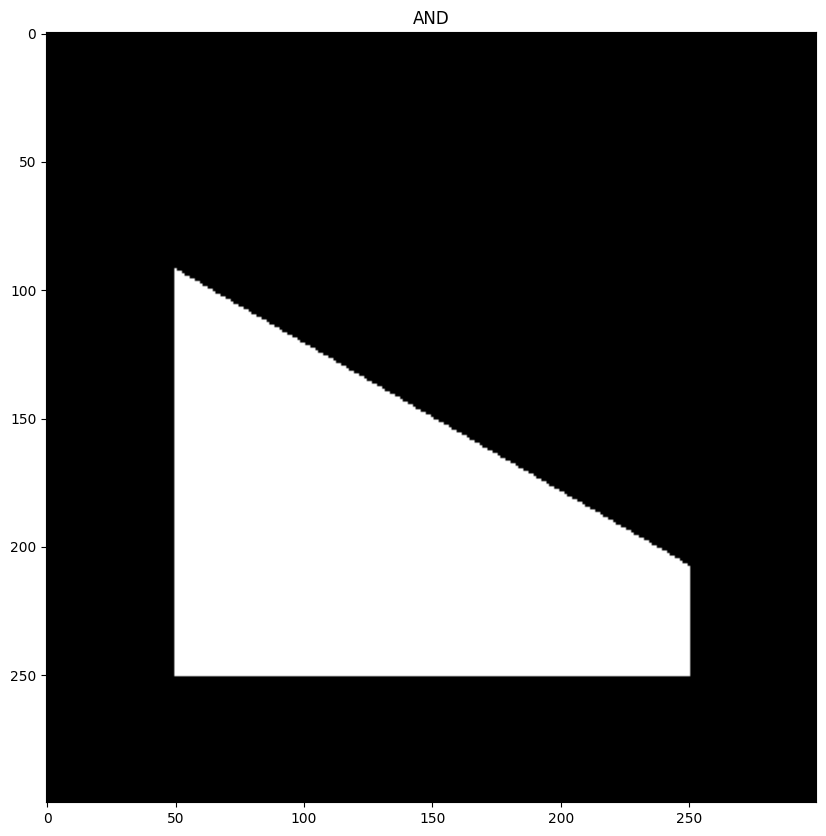

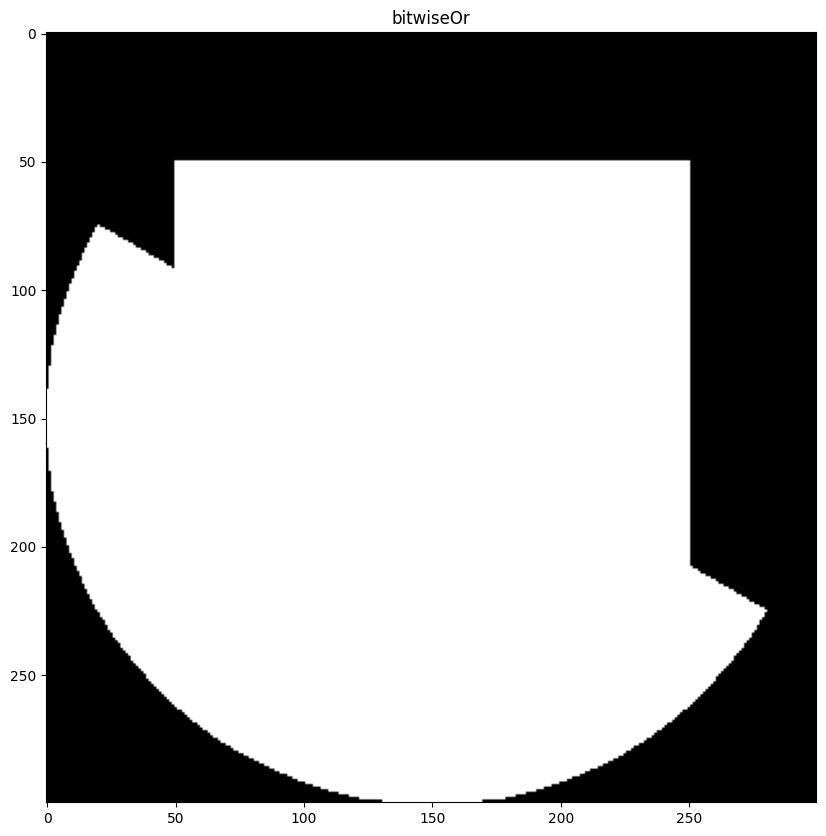

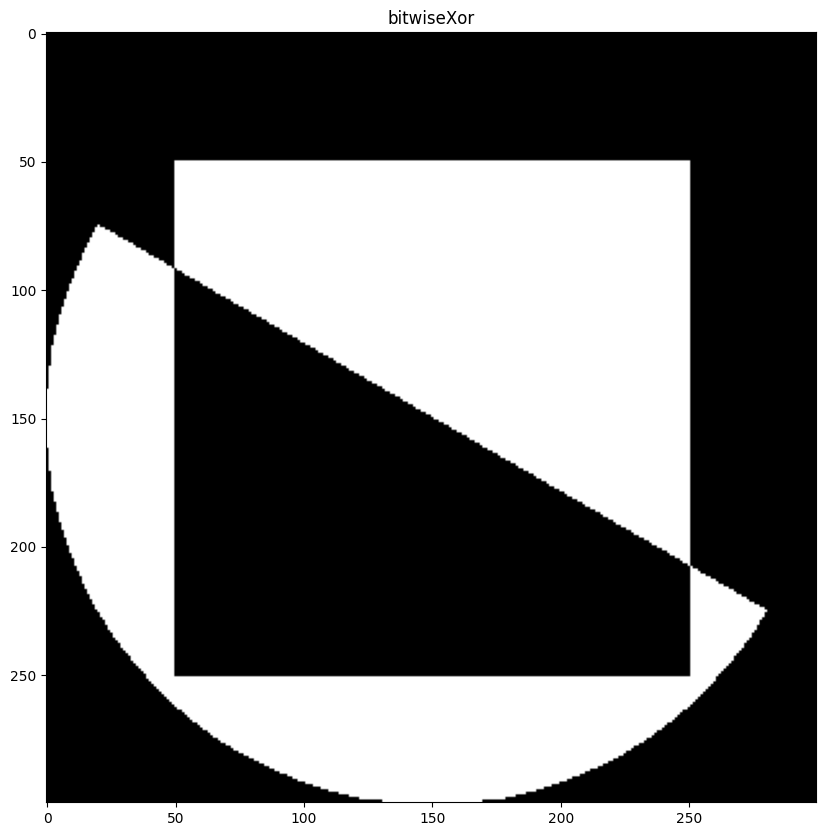

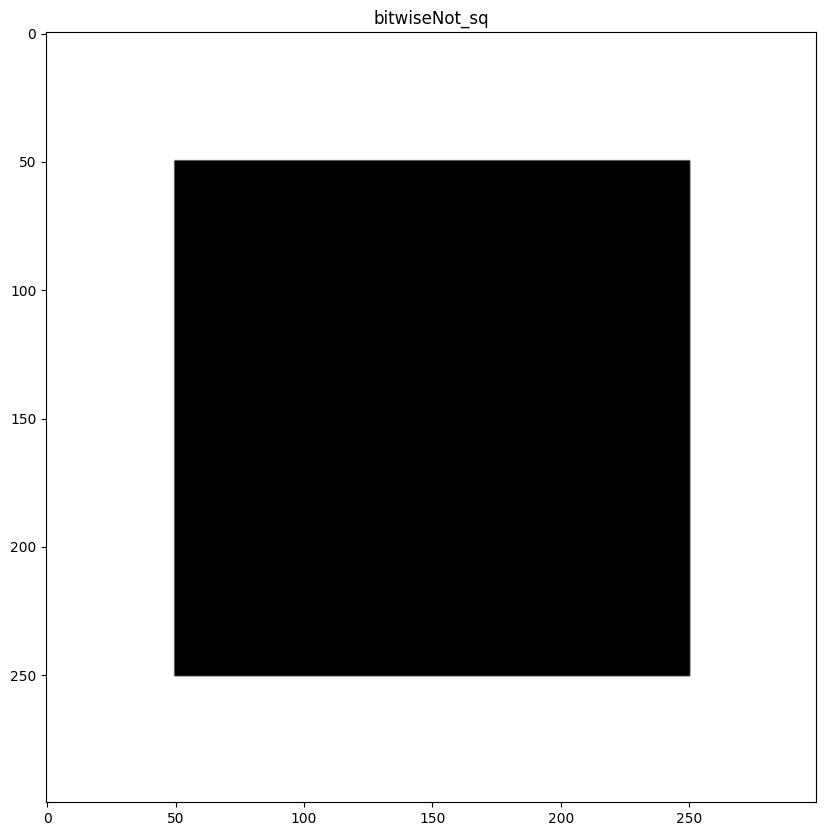

In [15]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
imshow("AND", And)

# Shows where either square or ellipse is
bitwiseOr = cv2.bitwise_or(square, ellipse)
imshow("bitwiseOr", bitwiseOr)

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
imshow("bitwiseXor", bitwiseXor)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
imshow("bitwiseNot_sq", bitwiseNot_sq)

# Notice the last operation inverts the image totally